In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("./cwfis_fwi2016.csv")

data.head()

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,opts,calcstatus
0,1012475,71031,2016-01-01 12:00:00,2.9,-0.4,78.9,31.5,NaN,30,1028.80,...,0.0,71.2,0.4,1.3,NaN,NaN,NaN,NaN,IDW=RH:R:M=1:,0
1,1012710,71798,2016-01-01 12:00:00,2.9,-0.4,79.2,24.1,33.3,10,1029.00,...,0.0,79.0,0.9,2.9,NaN,NaN,NaN,NaN,M=1:,0
2,1013998,719143,2016-01-01 12:00:00,4.1,-0.8,71.0,25.9,NaN,40,1029.29,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=T:RH:R:M=1:,-3
3,1014820,71774,2016-01-01 12:00:00,-0.6,-2.9,84.6,15.5,NaN,13,1028.10,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=WSD:M=1:,-3
4,1016640,71778,2016-01-01 12:00:00,2.8,-0.3,80.3,40.7,50.0,40,1028.70,...,0.0,75.7,0.5,1.5,NaN,NaN,NaN,NaN,IDW=R:M=1:,0


# DATA IMPORT / CLEAN

In [2]:
data.shape

(300105, 23)

we have 300105 data sets

In [3]:
df = data.dropna()

In [4]:
df.shape

(52092, 23)

In [5]:
df.head()

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,opts,calcstatus
20,1037553,71479,2016-01-01 12:00:00,8.2,-6.3,35.5,63.0,85.2,120,1021.5,...,0.0,84.9,1.1,3.9,1.3,49.8,19.2,5.1,M=1:,1
26,1051351,71107,2016-01-01 12:00:00,7.6,4.0,78.2,46.3,57.4,160,1020.2,...,0.0,64.6,0.2,6.8,0.3,5.4,1.7,0.1,M=1:,1
27,1054222,71472,2016-01-01 12:00:00,8.9,4.2,72.6,50.0,61.1,150,1016.7,...,0.0,81.4,1.7,10.6,2.5,16.5,9.3,1.4,M=1:,1
30,1056869,71477,2016-01-01 12:00:00,6.0,2.6,79.0,57.4,70.4,130,1019.8,...,0.0,48.6,0.1,0.8,0.2,2.5,0.5,0.0,M=1:,1
31,1057052,71111,2016-01-01 12:00:00,9.0,4.0,71.2,50.0,61.1,140,1018.5,...,0.0,78.9,0.6,5.4,1.0,12.7,5.9,0.6,M=1:,1


In [6]:
#use this if you want to predict fwi score as percentage
#otherwise, use fwi naturally
df['fire_percentage'] = (df['fwi']/30)*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df.head()

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,ffmc,dmc,dc,bui,isi,fwi,dsr,opts,calcstatus,fire_percentage
20,1037553,71479,2016-01-01 12:00:00,8.2,-6.3,35.5,63.0,85.2,120,1021.5,...,84.9,1.1,3.9,1.3,49.8,19.2,5.1,M=1:,1,64.000000
26,1051351,71107,2016-01-01 12:00:00,7.6,4.0,78.2,46.3,57.4,160,1020.2,...,64.6,0.2,6.8,0.3,5.4,1.7,0.1,M=1:,1,5.666667
27,1054222,71472,2016-01-01 12:00:00,8.9,4.2,72.6,50.0,61.1,150,1016.7,...,81.4,1.7,10.6,2.5,16.5,9.3,1.4,M=1:,1,31.000000
30,1056869,71477,2016-01-01 12:00:00,6.0,2.6,79.0,57.4,70.4,130,1019.8,...,48.6,0.1,0.8,0.2,2.5,0.5,0.0,M=1:,1,1.666667
31,1057052,71111,2016-01-01 12:00:00,9.0,4.0,71.2,50.0,61.1,140,1018.5,...,78.9,0.6,5.4,1.0,12.7,5.9,0.6,M=1:,1,19.666667


In [8]:
df = df.drop(['aes', 'wmo', 'rep_date', 'td', 'wg', 'wdir', 'pres', 'vis', 'rndays', 'sog', 'ffmc', 'dmc', 'dc', 'bui', 'isi', 'dsr', 'opts', 'calcstatus'], axis=1)

In [9]:
df.head(20)

,temp,rh,ws,precip,fwi,fire_percentage
20,8.2,35.5,63.0,0.0,19.2,64.000000
26,7.6,78.2,46.3,2.3,1.7,5.666667
27,8.9,72.6,50.0,0.0,9.3,31.000000
30,6.0,79.0,57.4,5.6,0.5,1.666667
31,9.0,71.2,50.0,0.0,5.9,19.666667
36,8.5,76.7,61.1,0.0,9.3,31.000000
38,6.2,64.8,55.6,0.0,9.8,32.666667
609,-1.0,80.3,22.2,0.0,0.3,1.000000
782,4.0,87.0,18.5,4.6,0.0,0.000000
852,5.9,82.4,50.0,0.0,8.3,27.666667


In [10]:
df.shape

(52092, 6)

In [11]:
df.to_csv("fwidataset2016")

In [12]:
X = df.iloc[:,[0,1,2,3,4]]

In [13]:
X.head()

,temp,rh,ws,precip,fwi
20,8.2,35.5,63.0,0.0,19.2
26,7.6,78.2,46.3,2.3,1.7
27,8.9,72.6,50.0,0.0,9.3
30,6.0,79.0,57.4,5.6,0.5
31,9.0,71.2,50.0,0.0,5.9


In [14]:
y = df.fwi

In [15]:
y.head()

20    19.2
26     1.7
27     9.3
30     0.5
31     5.9
Name: fwi, dtype: float64

In [16]:
y.shape

(52092,)

# EDA

### Scatter plots to check correlations between fwi and features

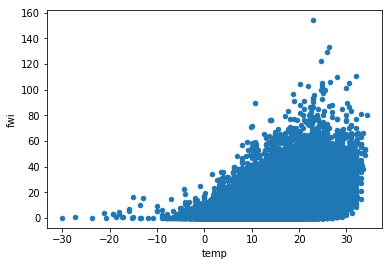

In [17]:
#scatter plot of temp/fwi
var = 'temp'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='fwi')

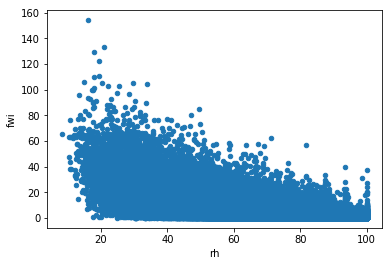

In [18]:
#scatter plot of rh(humidity)/fwi
var = 'rh'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='fwi')

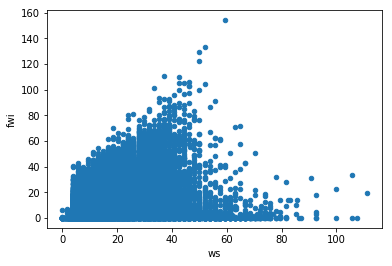

In [19]:
#scatter plot of ws(wind_speed)/fwi
var = 'ws'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='fwi')

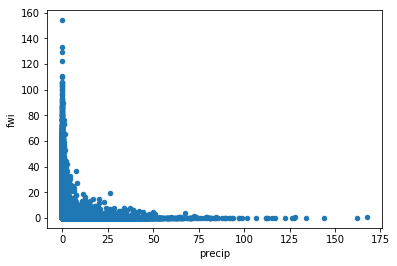

In [20]:
#scatter plot of temp/fwi
var = 'precip'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='fwi')

### TEMPERATURE

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


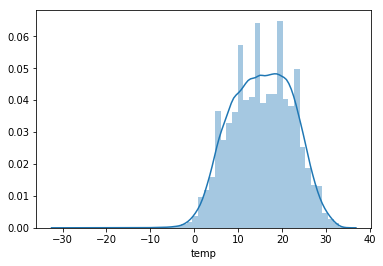

In [21]:
import seaborn as sns
sns.distplot(X['temp'])

In [22]:
# Log Transformation
X['temp'] = np.log(X['temp'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
X = X[np.isfinite(X['temp'])]

In [24]:
X['temp'].head()

20    2.104134
26    2.028148
27    2.186051
30    1.791759
31    2.197225
Name: temp, dtype: float64

In [25]:
X['temp'].shape

(51617,)

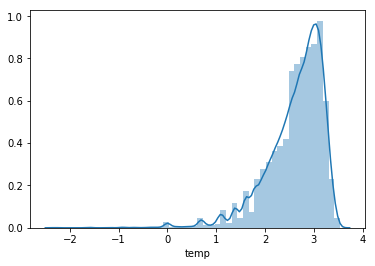

In [26]:
sns.distplot(X['temp'])

* Taking a log seems to not help in terms of the skewness, but it helps in normalizing the middle values. So, we will still use this.

### HUMIDITY

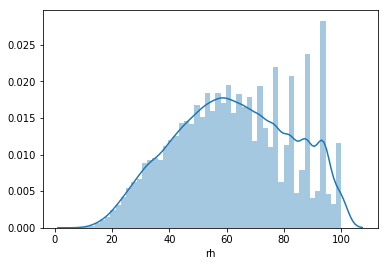

In [27]:
sns.distplot(X['rh'])

In [28]:
# Log Transformation
X['rh'] = np.log(X['rh'])

In [29]:
X = X[np.isfinite(X['rh'])]

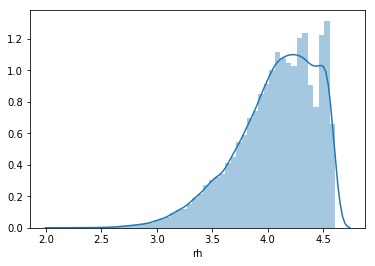

In [30]:
sns.distplot(X['rh'])

* Even though it became skewed to the right a little bit, it's not significant, and what's good is that it minimized the outliers on the right from the original. So, we will use this.

### WIND-SPEED

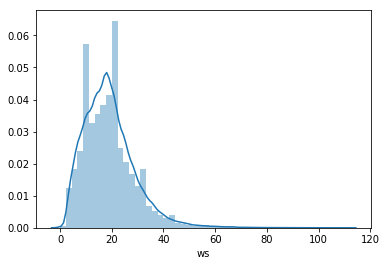

In [31]:
sns.distplot(X['ws'])

In [32]:
# Log Transformation
# X['ws'] = np.log(X['ws'])

In [33]:
# X = X[np.isfinite(X['ws'])]

In [34]:
# sns.distplot(X['ws'])

* This was worse result. So, we won't go ahead and log this.

# PRECIPITATION

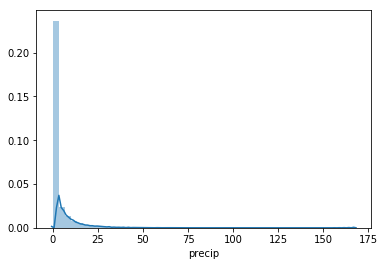

In [35]:
sns.distplot(X['precip'])

In [36]:
# Log Transformation
# X['precip'] = np.log(X['precip'])

In [37]:
# X = X[np.isfinite(X['precip'])]

In [38]:
X = X.dropna()

In [39]:
# sns.distplot(X['precip'])

* The original precip histogram showed excessive skewness to the left and outliers to the right. After taking a log transformation, this is worse as the outliers have more effects. So, we will use the data as is. So, all 4 are feature engineered.

As we can see here, the temperature is the strongest feature that we can use (because we have the temp sensors) but, as we know from the common sense, temperature only will not dictate the value of fwi's. So, we will go on and look at other features such as humidity, wind_speed, and precipitation, and eventually use all 4 features to predict fwi. My team will implement Weather API to input these features into the prediction function that I make.

In [40]:
X = pd.get_dummies(X, drop_first=True)

In [41]:
y = X.fwi

In [42]:
X = X.iloc[:,[0,1,2,3]]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [44]:
X_train.head()

,temp,rh,ws,precip
209286,2.949688,3.885679,13.0,0.00
191730,3.044522,3.970292,16.7,0.00
162642,2.302585,4.335983,14.8,19.59
132970,2.708050,3.586293,20.4,0.30
264264,0.182322,4.375757,20.4,0.00


### Feature Scailing

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
pred = linear.predict(X_test)

In [48]:
r2_score(y_test,pred)

0.5349387631542621

* the result is not ideal as expected. Success rate for predicting FWI score based on tempearture, humidity, wind_speed, and rain precipitation is 51%.
* because our sensors will only have temp anyways and rely other data on other sources such as weather stations - which are not reliable - I will conduct linear regression prediction only using temp.
* So, we will go ahead and use ML algo's other than linear regression. Let's look at Random Forrest first.

### Random Forrest

In [49]:
from sklearn.ensemble import RandomForestRegressor

#regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
acc = regressor.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:', acc)

Mean Absolute Error: 4.187290791998255
Mean Squared Error: 43.41137778847731
Root Mean Squared Error: 6.588731121276487
Accuracy: 0.6758877738352556


* the result is way better than linear regression ml. Using RF, we can achieve 68%, which is much better than 50%. Let's try XGBoost as a last one.

### XGBoost

In [51]:
import xgboost as xgb

In [52]:
#initalize
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg = xgb.XGBRegressor()

In [53]:
#fit the model
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [54]:
#rmse
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5.963382


In [55]:
#accruacy
accuracy = xg_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7344923038778584


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [58]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
accuracy = svc.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.13663954539584142


* As we can see, the result for SVC is not apt for this problem. Same with RandomForestClassifier, AdaBoostClassifier, GaussianNB, and LinearDiscriminantAnalysis.
* As we have predicted, such tabular data is the best apt with the model xgboost.

* Note: XGBoost is the leading model for working with standard tabular data. XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm.
* The implementation of the algorithm is such that the compute time and memory resources are very efficient. A design goal was to make the best use of available resources to train the model. Some key algorithm implementation features include: Sparse dataset: Algorithm designed to handle sparse data easily. Block Structure: This help in parallelization of the algorithm.

## Conclusion

* At this point, we have 74% accuracy rate on predicting FWI score. This means that out of 4 fire happenings, we would guess 3 correctly. This is not a stable score, and it's due to the following:

* Data has too many missing values on either of Temp, Humidity, Wind Speed, and Precip.
* FWI scores are calculated with constant coefficients in the equations, and these coefficients have potential of being biased.
* Too many missing data led to too less of a data to do DNN or CNN or even RNN.
* As LALI sensors gather more data which would be more reliable due to them being collected on spot, these additional data can bring in great values to the future data collection, which will lead to better prediction.